1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
vehicle_df = pd.read_csv('vehicle.csv',skipinitialspace=True)

In [3]:
vehicle_df.shape

(846, 19)

In [4]:
vehicle_df.dropna(inplace=True)

In [5]:
vehicle_df.shape

(813, 19)

In [6]:
vehicle_df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [7]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

#### Observing float datatype for most columns. Can be converted to int as the values are all rounded off

In [8]:
for col in vehicle_df.columns:
    if(vehicle_df[col].dtypes==float):
        vehicle_df[col]=vehicle_df[col].astype(int)

In [9]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null int32
distance_circularity           813 non-null int32
radius_ratio                   813 non-null int32
pr.axis_aspect_ratio           813 non-null int32
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null int32
elongatedness                  813 non-null int32
pr.axis_rectangularity         813 non-null int32
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null int32
scaled_variance.1              813 non-null int32
scaled_radius_of_gyration      813 non-null int32
scaled_radius_of_gyration.1    813 non-null int32
skewness_about                 813 non-null int32
skewness_about.1               813 non-null int32
skewness_about.2               813 non-null int32
hollows_ratio                  813 non-null i

In [10]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [11]:
vehicle_df['class']=vehicle_df['class'].astype('category')
vehicle_df['class']=vehicle_df['class'].cat.codes

In [12]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,2
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,2
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,1
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,2
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


In [13]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null int32
distance_circularity           813 non-null int32
radius_ratio                   813 non-null int32
pr.axis_aspect_ratio           813 non-null int32
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null int32
elongatedness                  813 non-null int32
pr.axis_rectangularity         813 non-null int32
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null int32
scaled_variance.1              813 non-null int32
scaled_radius_of_gyration      813 non-null int32
scaled_radius_of_gyration.1    813 non-null int32
skewness_about                 813 non-null int32
skewness_about.1               813 non-null int32
skewness_about.2               813 non-null int32
hollows_ratio                  813 non-null i

In [14]:
vehicle_df.groupby('class').count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
0,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
1,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
2,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195


##### Observing class imbalance. Car data is in abundance as compared to van or bus

In [15]:
missing_values=vehicle_df.columns[vehicle_df.isnull().any()]
print(missing_values)

Index([], dtype='object')


##### No missing values

#### Standardizing the data

In [16]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


#### Observations :
Skewed columns : scatter_ratio, elongatedness, scaled_variance.1

C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pokrishn\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


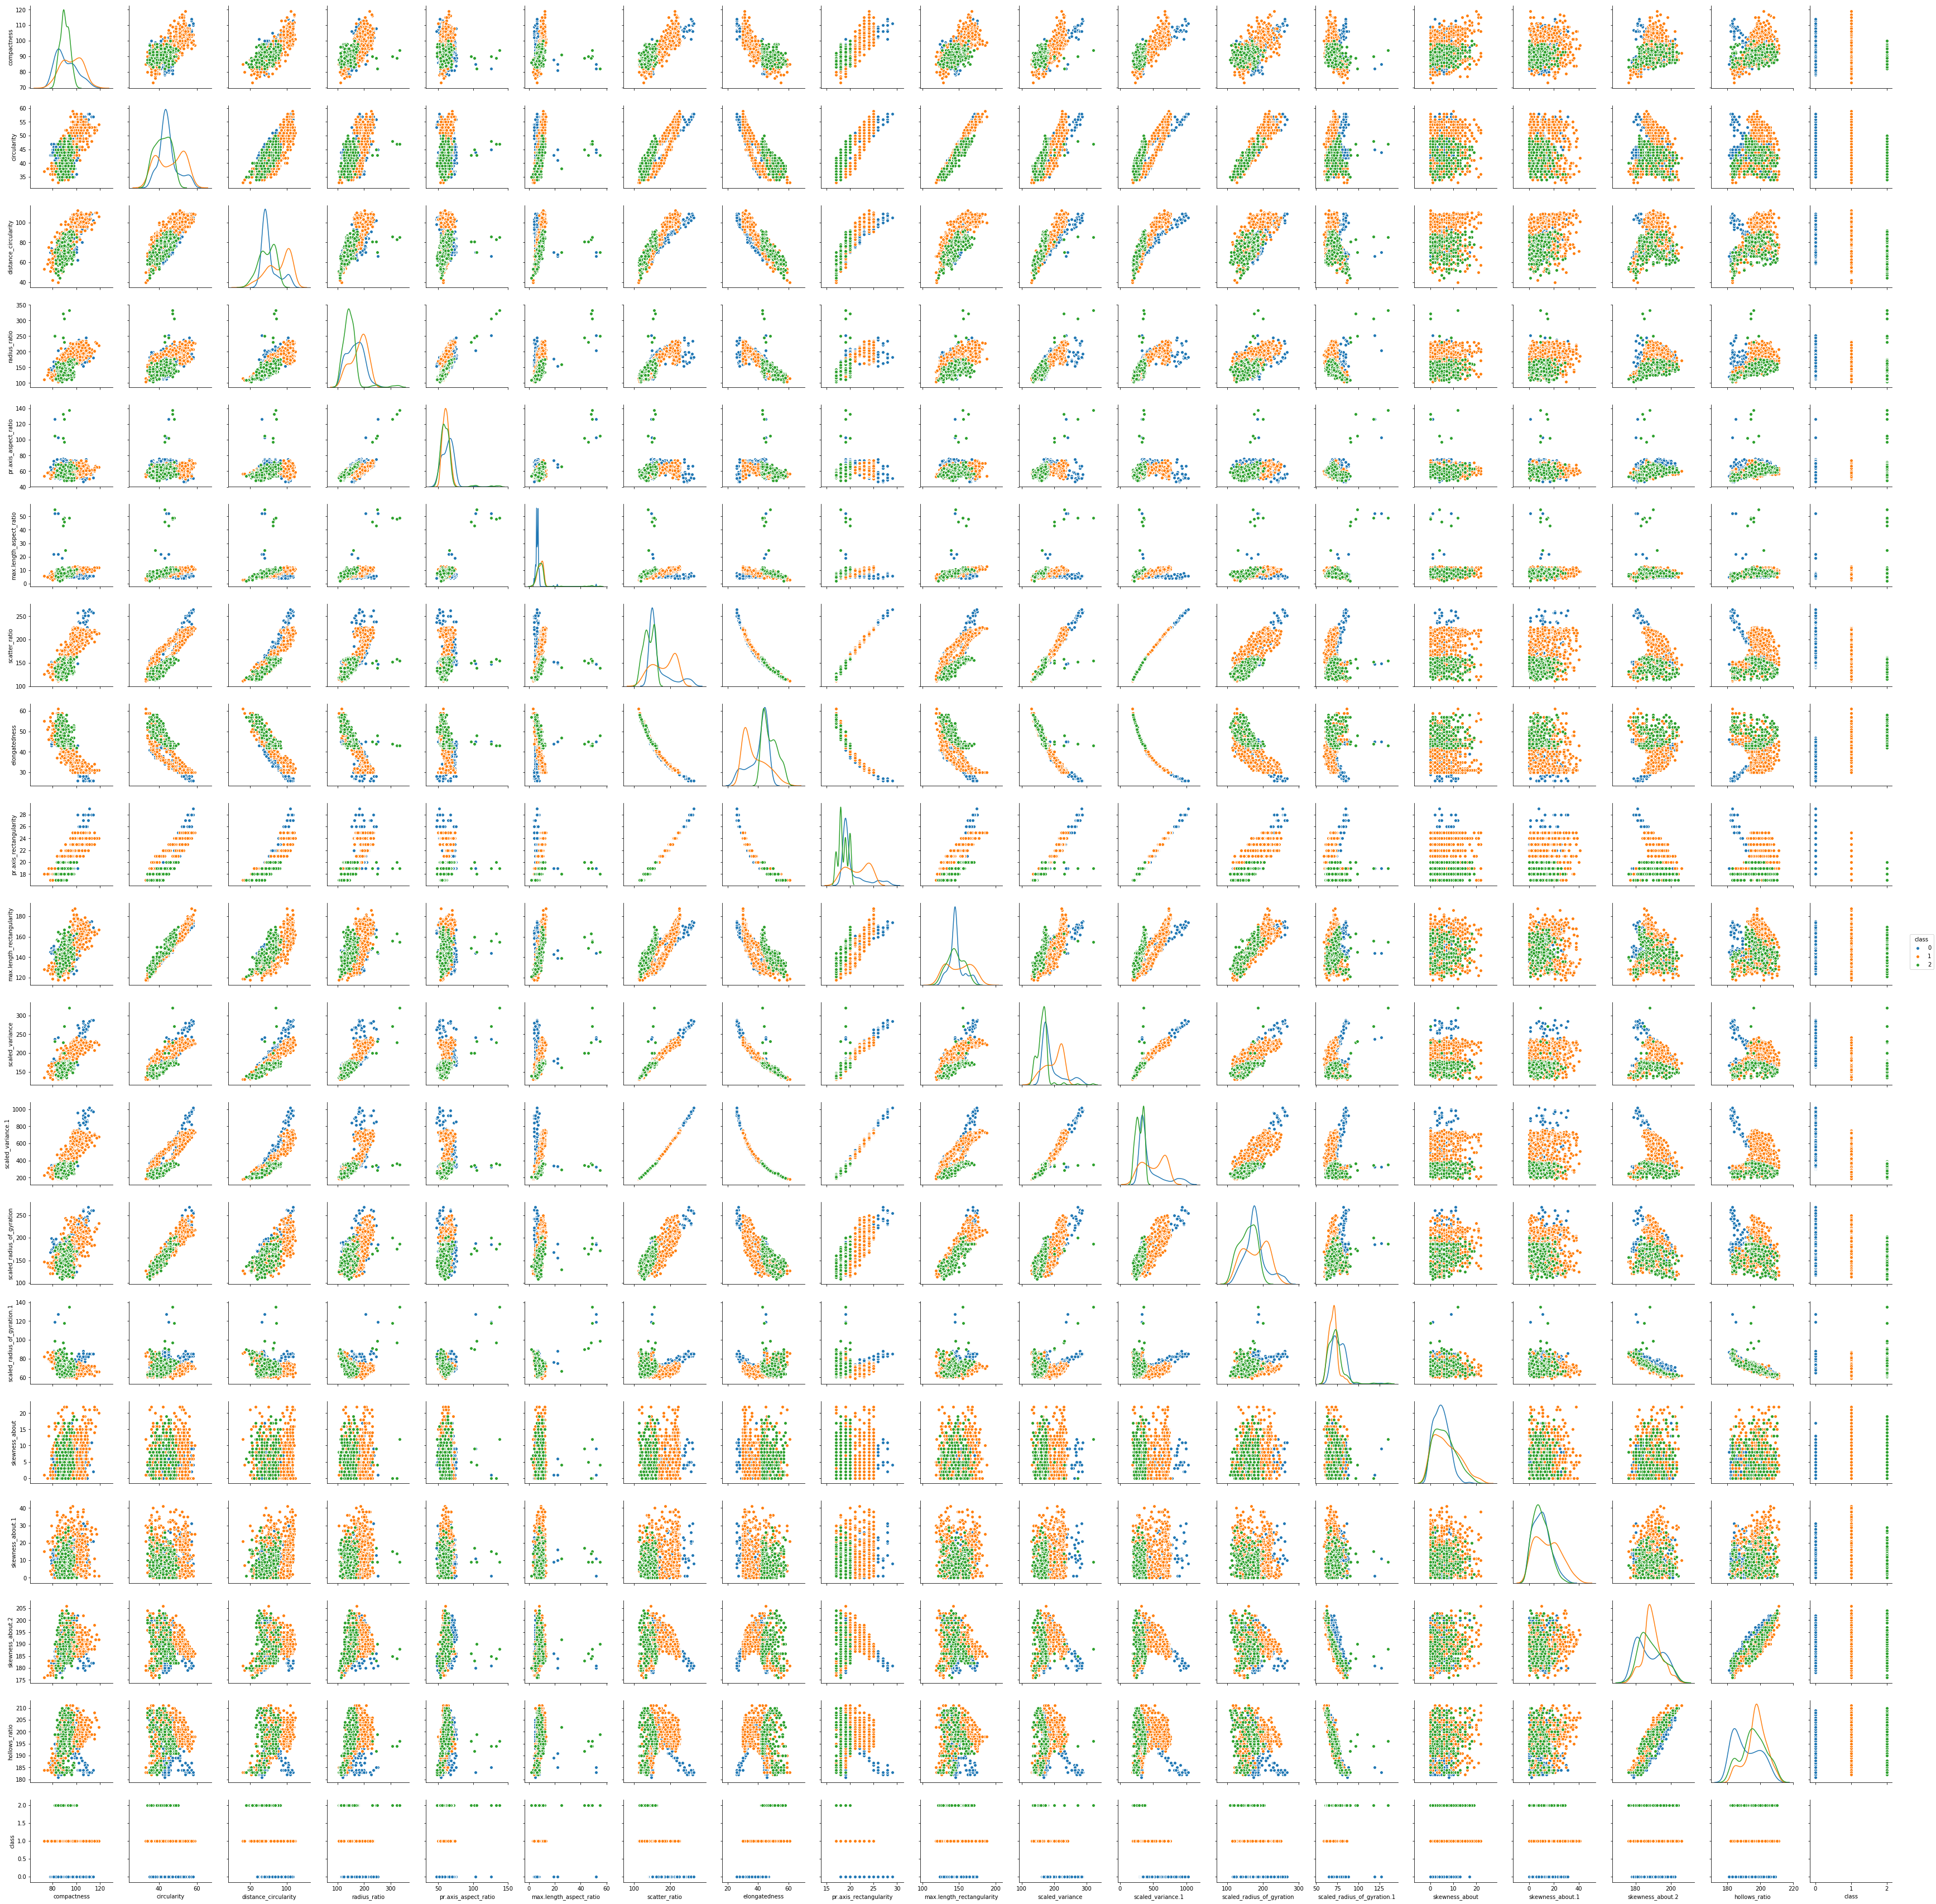

In [17]:
sns.pairplot(vehicle_df,hue='class',diag_kind='kde')

#### Observing sub-classes within class category due to the hue. Will check correlation using heatmap

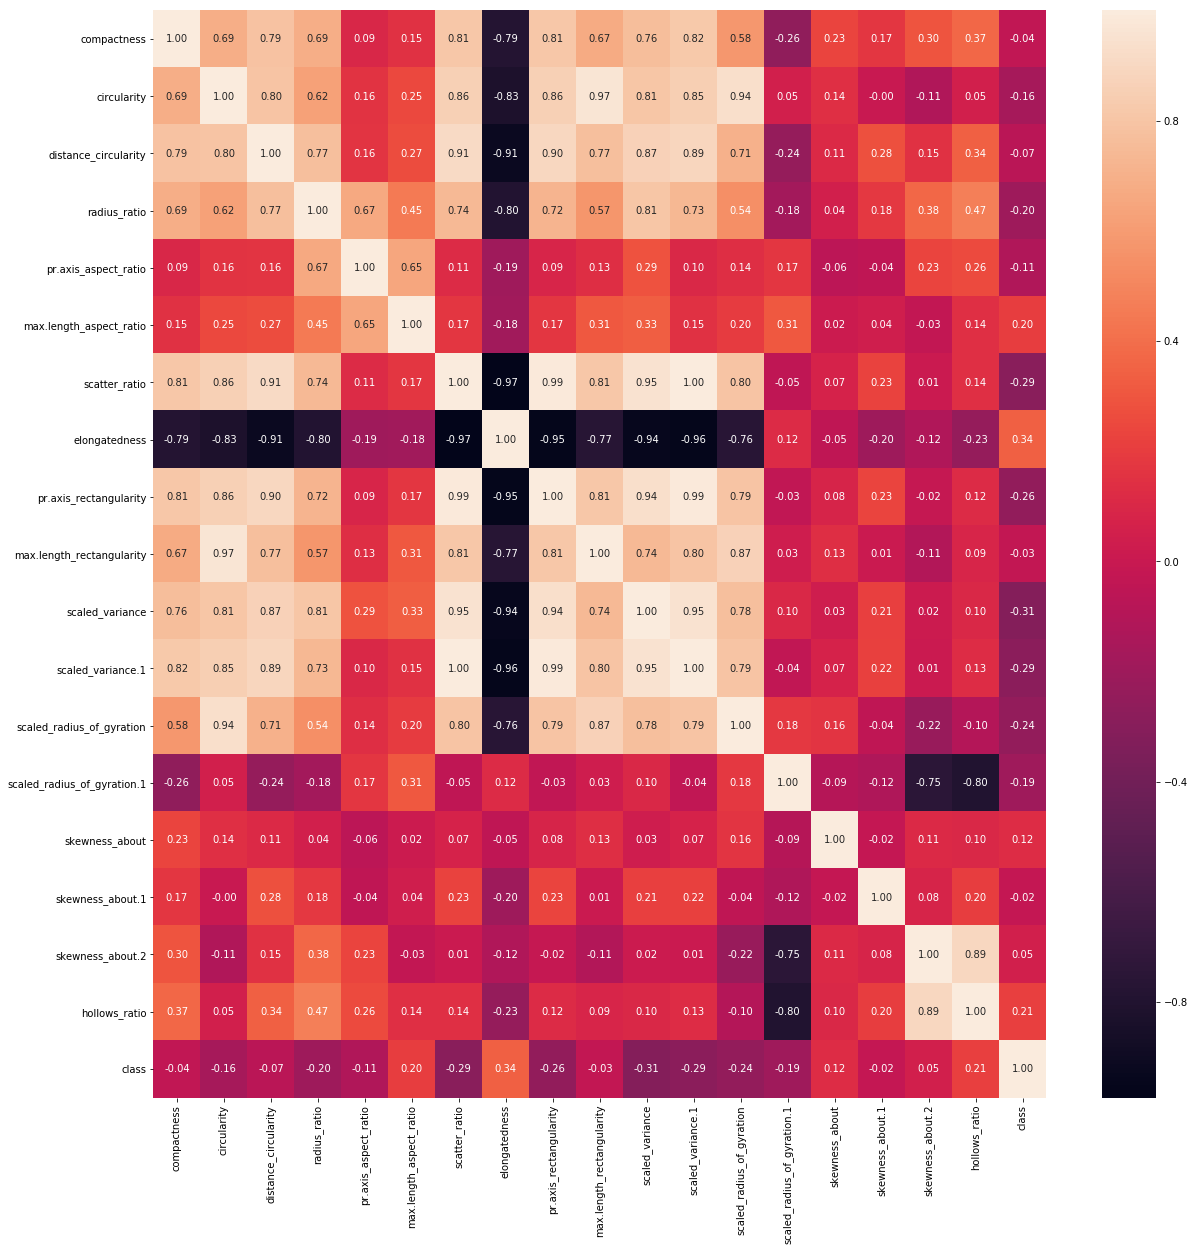

In [18]:
corr=vehicle_df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,annot=True,fmt='0.2f')

#### Observations :
##### Observing high correlation from compactness to radius_ratio 
##### Observing high correlation from scatter_ratio to scaled_radius_of_gyration \n
##### Will drop circularity and distance_circularity assuming that radius_ratio should take into account the same
##### Will drop scatter ratio, pr.axis_rectangularity as max.axis_rectangularity will be more useful in assessing the image silhoutte rather than that of primary axis (I feel)
##### Will drop scaled.variance.1 as it sould be along one of the axes - major/minor. scaled.variance should be enough for assessing the same
##### Will drop skewness_about.2 as it is highly correlated with the hollow_ratio

In [19]:
vehicle_df1=vehicle_df.drop(['circularity','distance_circularity','scatter_ratio','pr.axis_rectangularity','scaled_variance','skewness_about.2'],axis=1)

In [20]:
vehicle_groups=vehicle_df[['class']]
vehicle_df1.drop('class',axis=1,inplace=True)
vehicle_df2=vehicle_df1.apply(stats.zscore)

In [21]:
vehicle_df2=vehicle_df2.join(vehicle_groups)
vehicle_df2.head()

,compactness,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,elongatedness,max.length_rectangularity,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,hollows_ratio,class
0,0.163231,0.264970,1.283254,0.299721,0.129648,0.766312,-0.339014,0.301676,-0.321192,-0.071523,0.371287,0.171837,2
1,-0.322874,-0.836393,-0.599253,0.085785,0.514333,-0.337462,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.442318,2
2,1.256966,1.187734,0.530251,0.299721,-1.152637,0.697326,1.122486,1.415804,0.080339,1.555006,-0.413338,0.036596,1
3,-0.079822,-0.300595,0.153750,0.085785,0.642562,-0.337462,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.524243,2
4,-1.052030,1.068668,5.173770,9.285029,0.514333,-0.268476,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.721531,0


In [22]:
#Removing outliers based on 2.5 z-score
vehicle_df3=vehicle_df2[(np.abs(vehicle_df2) < 2.5).all(axis=1)]
vehicle_df3.shape

(753, 13)

In [23]:
vehicle_df1.shape

(813, 12)

In [24]:
pca = PCA().fit(vehicle_df3)

In [25]:
pca.n_components_

13

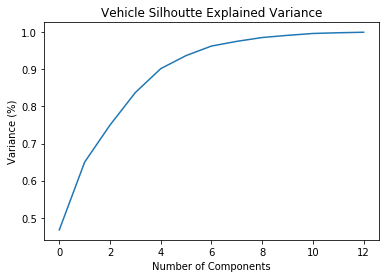

In [26]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Silhoutte Explained Variance')
plt.show()

##### Observing 95% variance captured in 7 components

In [27]:
pca = PCA(n_components=7)
vehicle_df4 = pca.fit_transform(vehicle_df3)

In [28]:
vehicle_df4.shape

(753, 7)

In [29]:
vehicle_df4 = pd.DataFrame(vehicle_df4)

In [30]:
vehicle_df4.head()

,0,1,2,3,4,5,6
0,-0.761375,-0.476462,0.258970,-0.121147,-0.435641,-1.398959,0.957534
1,1.086279,-0.570110,1.084900,0.550295,-0.453954,-0.137934,0.036466
2,-2.929111,0.695450,1.196543,-0.236866,0.989824,0.058837,0.510723
3,0.825907,-2.409223,0.647807,-0.421331,-0.689249,0.009200,0.187234
4,-0.273494,-0.999385,1.042358,-1.370698,1.495427,0.559796,-0.612282


In [31]:
X = vehicle_df4
y= vehicle_df3['class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

In [33]:
svc = svm.SVC(C=0.01, kernel='linear').fit(X_train, y_train)

In [34]:
svc.score(X_test, y_test)

0.9513274336283186

In [35]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.05, 0.5, 1]
    gammas = [0.001, 0.01, 0.1, 1]
    ker = ['linear','rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : ker}
    
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [36]:
svc_param_selection(X,y,5)

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [37]:
svc = svm.SVC(C=0.5, kernel='rbf',gamma = 0.1).fit(X_train, y_train)

In [38]:
svc.score(X_test, y_test)

1.0

#### Looks like overfitting given the param combination